# Total Reflectance from Human Skin

**Scott Prahl**

**Nov 2021**

**version 1**

Test the ability to grab an arbitrary sample from the 100 available.

The paper is available at

   [Reference Data Set of Human Skin Reflectance](https://doi.org/10.6028/jres.122.026)

The data is available at

   [The Data Set](https://doi.org/10.18434/M38597)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iadpython.nist

%config InlineBackend.figure_format='retina'

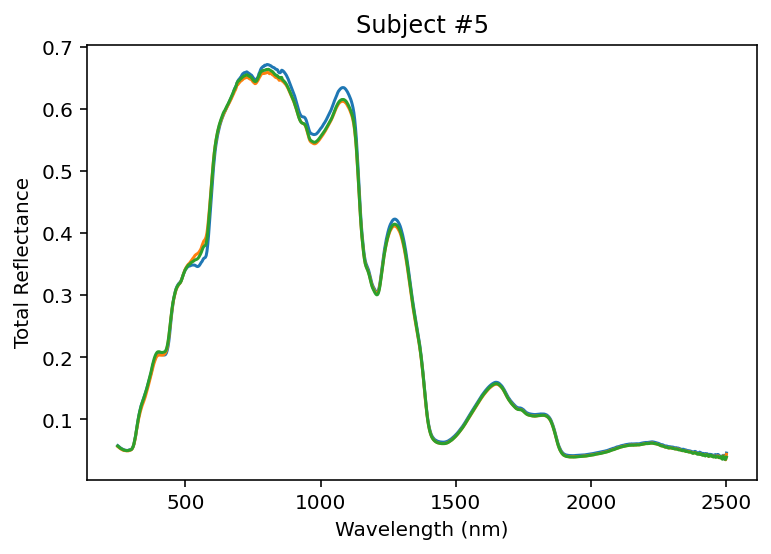

In [2]:
subject_number = 5

λ,R1,R2,R3,_ = iadpython.nist.subject_reflectances(subject_number)
plt.plot(λ,R1)
plt.plot(λ,R2)

plt.plot(λ,R3)


plt.xlabel("Wavelength (nm)")
plt.ylabel("Total Reflectance")
plt.title("Subject #%d" % subject_number)
plt.show()



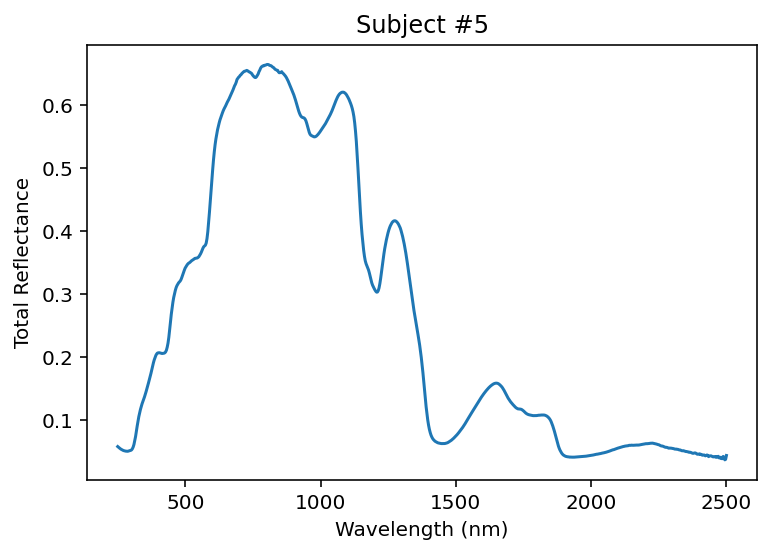

In [3]:
subject_number = 5

λ,R = iadpython.nist.subject_average_reflectance(subject_number)
plt.plot(λ,R)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Total Reflectance")
plt.title("Subject #%d" % subject_number)
plt.show()


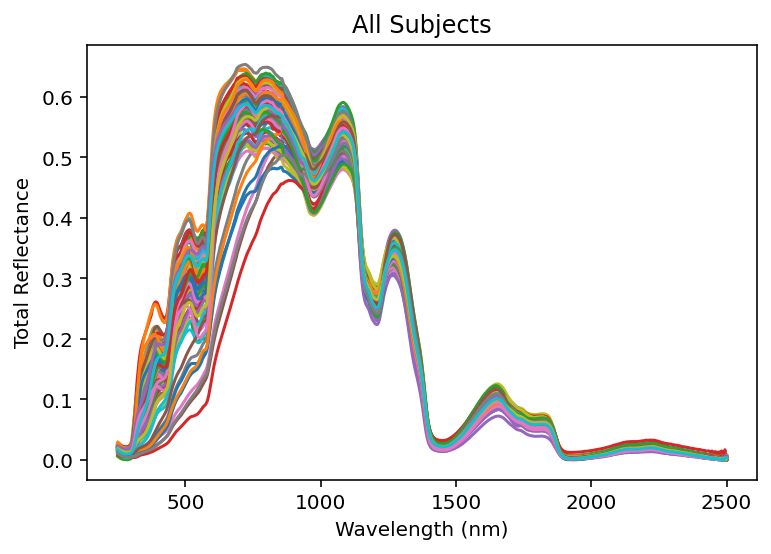

In [4]:
λ,R = iadpython.nist.all_average_reflectances()

for i in range(100):
    plt.plot(λ,R[:,i]-np.min(R[:,i]))

plt.xlabel("Wavelength (nm)")
plt.ylabel("Total Reflectance")
plt.title("All Subjects")
plt.show()

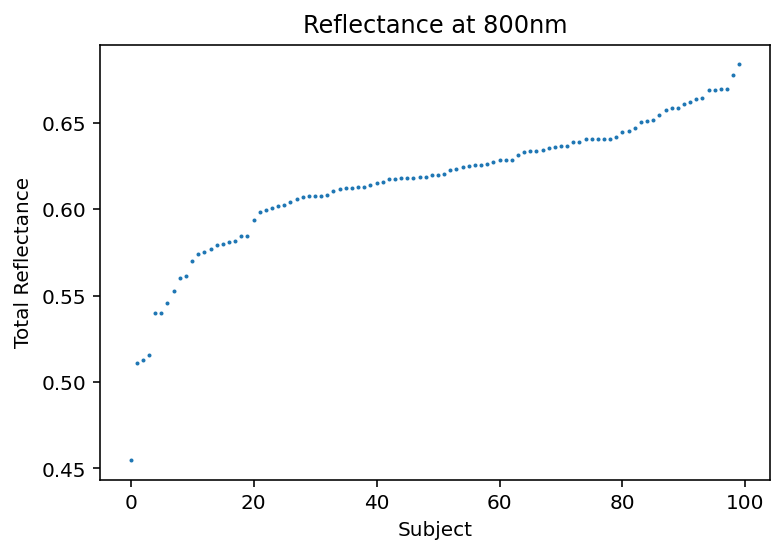

In [5]:
λ,R = iadpython.nist.all_average_reflectances()

j = np.abs(λ-800).argmin()

R_near_800nm = R[j,:]

R = np.sort(R_near_800nm)

plt.plot(R, 'o', markersize=1)

plt.xlabel("Subject")
plt.ylabel("Total Reflectance")
plt.title("Reflectance at 800nm")
plt.show()

In [6]:
def dawson_melanin(λ,R):
    
    L = -np.log(R)

    j700 = np.abs(λ-700).argmin()
    j650 = np.abs(λ-650).argmin()

    M = 100 * (L[j650] - L[j700] + 0.015)
    
    return M

 

In [7]:
def kollias_melanin(λ,R):
    
    L = -np.log(R)

    j720 = np.abs(λ-700).argmin()
    j620 = np.abs(λ-650).argmin()
    
    C2, C1 = np.polyfit(λ[j620:j720],L[j620:j720],1)
#    linear_model_fn=np.poly1d([C2,C1])
#    fitted = linear_model_fn(λ)
#    print(linear_model)

#    plt.xlim(400,800)
#    plt.plot(λ,L)
#    plt.plot(λ,fitted)
#    plt.show()    
    return C1, C2



In [8]:
λ,R = iadpython.nist.subject_average_reflectance(25)

kollias_melanin(λ,R)



(1.301623639826864, -0.0011112599552051414)

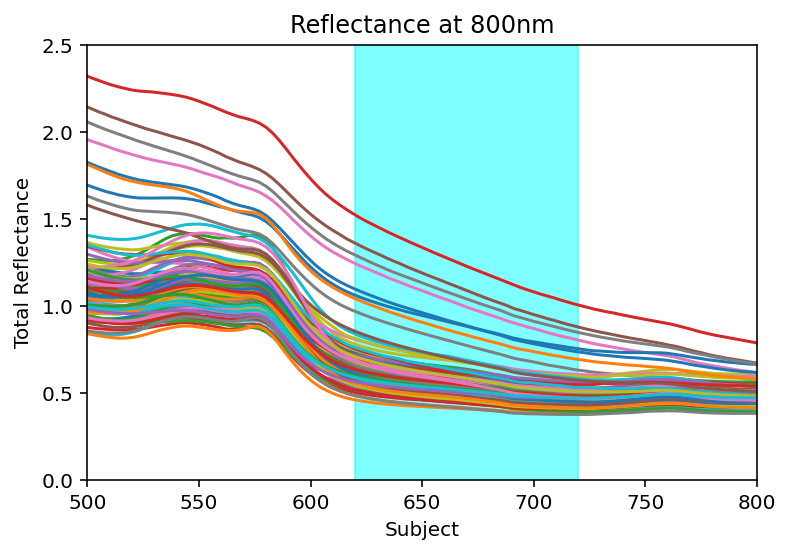

In [9]:
λ,R = iadpython.nist.all_average_reflectances()

L = -np.log(R)

j700 = np.abs(λ-700).argmin()
j650 = np.abs(λ-650).argmin()

M = 100 * (L[j650] - L[j700] + 0.015)

plt.plot(λ,L)

plt.xlim(500,800)
plt.ylim(0,2.5)
plt.axvspan(620,720,color='cyan',alpha=0.5)

plt.xlabel("Subject")
plt.ylabel("Total Reflectance")
plt.title("Reflectance at 800nm")
plt.show()

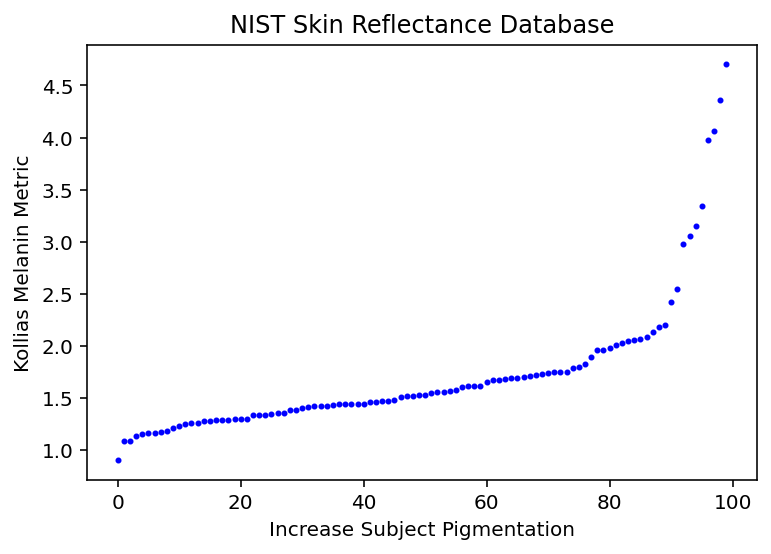

In [10]:
λ,R = iadpython.nist.all_average_reflectances()

c = np.array([])
m = np.array([])
for i in range(100):
    c1, c2 = kollias_melanin(λ, R[:,i])
    m1 = dawson_melanin(λ, R[:,i])
    c = np.append(c, c1)
    m = np.append(m, m1)

csort = np.sort(c)
plt.title("NIST Skin Reflectance Database")
plt.plot(csort, 'bo',markersize=2)
plt.xlabel("Increase Subject Pigmentation")
plt.ylabel("Kollias Melanin Metric")
plt.show()

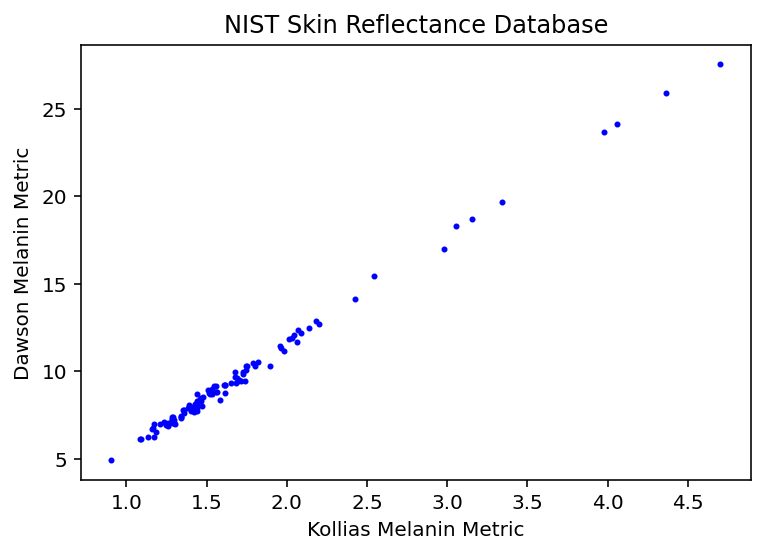

In [11]:
λ,R = iadpython.nist.all_average_reflectances()

c = np.array([])
m = np.array([])
for i in range(100):
    c1, c2 = kollias_melanin(λ, R[:,i])
    m1 = dawson_melanin(λ, R[:,i])
    c = np.append(c, c1)
    m = np.append(m, m1)

plt.title("NIST Skin Reflectance Database")
plt.plot(c, m, 'bo',markersize=2)
plt.ylabel("Dawson Melanin Metric")

plt.xlabel("Kollias Melanin Metric")
plt.show()